In [20]:
# significant help from StatQuest https://www.youtube.com/watch?v=q90UDEgYqeI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('data/coffee_notes-espresso_data_semi_clean.csv')
df.head()

,number,date,beans,grind (lido et ticks),coffee (g),water (g),"pressure (bar, peak-ish)",time (s),yield (g),yield (ratio),tamp pressure,rating
0,1,2019-12-26,mill_house_blend,4,16.0,93,4.0,32,58,3.63,kinda high,bad
1,2,2019-12-26,mill_house_blend,0,16.0,95,10.0,75,7,0.44,kinda high,bad
2,3,2019-12-26,mill_house_blend,2,16.0,96,7.5,76,61,3.81,kinda high,bad
3,4,2019-12-26,Orsons,2,16.0,92,10.0,40,12,0.75,kinda high,bad
4,5,2019-12-26,Orsons,3,16.0,89,10.0,150,52,3.25,kinda high,bad


In [3]:
df.dtypes

number                       object
date                         object
beans                        object
grind (lido et ticks)        object
coffee (g)                  float64
water (g)                    object
pressure (bar, peak-ish)    float64
time (s)                     object
yield (g)                    object
yield (ratio)                object
tamp pressure                object
rating                       object
dtype: object

In [4]:
df.drop(columns=["number"], inplace=True)

In [5]:
new_cols = ['date', 'beans', 'grind', 'dose', 'water', 'pressure', 'time', 'yield', 'yield_ratio', 'tamp_pressure', 'rating']
df.columns = new_cols
df.drop(columns=["water"], inplace=True)
df.head()

,date,beans,grind,dose,pressure,time,yield,yield_ratio,tamp_pressure,rating
0,2019-12-26,mill_house_blend,4,16.0,4.0,32,58,3.63,kinda high,bad
1,2019-12-26,mill_house_blend,0,16.0,10.0,75,7,0.44,kinda high,bad
2,2019-12-26,mill_house_blend,2,16.0,7.5,76,61,3.81,kinda high,bad
3,2019-12-26,Orsons,2,16.0,10.0,40,12,0.75,kinda high,bad
4,2019-12-26,Orsons,3,16.0,10.0,150,52,3.25,kinda high,bad


In [6]:
df = df[df["beans"].notnull()]
df.reset_index(drop=True, inplace=True)

In [7]:
def tamp_simplify(tamp_description):
    tamp_description = str(tamp_description)
    if 'heavy' in tamp_description or 'high' in tamp_description:
        return 'heavy'
    elif 'med' in tamp_description:
        return 'medium'
    elif 'light' in tamp_description:
        return 'light'
    else:
        return np.NaN

pd.set_option('mode.chained_assignment','warn')
df.loc[:, ("tamp_pressure")] = df["tamp_pressure"].map(tamp_simplify)
df.head()

,date,beans,grind,dose,pressure,time,yield,yield_ratio,tamp_pressure,rating
0,2019-12-26,mill_house_blend,4,16.0,4.0,32,58,3.63,heavy,bad
1,2019-12-26,mill_house_blend,0,16.0,10.0,75,7,0.44,heavy,bad
2,2019-12-26,mill_house_blend,2,16.0,7.5,76,61,3.81,heavy,bad
3,2019-12-26,Orsons,2,16.0,10.0,40,12,0.75,heavy,bad
4,2019-12-26,Orsons,3,16.0,10.0,150,52,3.25,heavy,bad


In [8]:
cols_to_convert = ["grind", "dose", "pressure", "time", "yield", "yield_ratio"]
df.loc[:, cols_to_convert] = df.loc[:, cols_to_convert].apply(pd.to_numeric, errors='coerce').copy()

,date,beans,grind,dose,pressure,time,yield,yield_ratio,tamp_pressure,rating
0,2019-12-26,mill_house_blend,4.0,16.0,4.0,32.0,58.0,3.63,heavy,bad
1,2019-12-26,mill_house_blend,0.0,16.0,10.0,75.0,7.0,0.44,heavy,bad
2,2019-12-26,mill_house_blend,2.0,16.0,7.5,76.0,61.0,3.81,heavy,bad
3,2019-12-26,Orsons,2.0,16.0,10.0,40.0,12.0,0.75,heavy,bad
4,2019-12-26,Orsons,3.0,16.0,10.0,150.0,52.0,3.25,heavy,bad
5,2019-12-26,Orsons,4.0,16.0,10.0,90.0,53.0,3.31,heavy,bad
6,2019-12-26,Orsons,5.0,16.0,10.0,65.0,52.0,3.25,heavy,bad
7,2019-12-26,Orsons,6.0,16.0,9.0,35.0,51.0,3.19,heavy,okay
8,2019-12-31,Orsons,6.0,16.0,9.0,NaN,NaN,NaN,heavy,okay
9,2019-12-31,Orsons,5.0,16.0,9.0,NaN,NaN,NaN,heavy,okay


In [9]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

,date,beans,grind,dose,pressure,time,yield,yield_ratio,tamp_pressure,rating
0,2019-12-26,mill_house_blend,4.0,16.0,4.0,32.0,58.0,3.63,heavy,bad
1,2019-12-26,mill_house_blend,0.0,16.0,10.0,75.0,7.0,0.44,heavy,bad
2,2019-12-26,mill_house_blend,2.0,16.0,7.5,76.0,61.0,3.81,heavy,bad
3,2019-12-26,Orsons,2.0,16.0,10.0,40.0,12.0,0.75,heavy,bad
4,2019-12-26,Orsons,3.0,16.0,10.0,150.0,52.0,3.25,heavy,bad
5,2019-12-26,Orsons,4.0,16.0,10.0,90.0,53.0,3.31,heavy,bad
6,2019-12-26,Orsons,5.0,16.0,10.0,65.0,52.0,3.25,heavy,bad
7,2019-12-26,Orsons,6.0,16.0,9.0,35.0,51.0,3.19,heavy,okay
8,2020-01-01,Orsons,5.0,18.0,10.0,90.0,45.0,2.50,heavy,bad
9,2020-01-01,Orsons,7.0,18.0,7.0,25.0,47.0,2.61,heavy,okay


In [ ]:
df["rating"] = df["rating"].apply(lambda rating: True)

In [17]:
# split data 
indep_cols = ["beans", "grind", "dose", "pressure", "time", "yield", "yield_ratio", "tamp_pressure"]
dep_cols = ["rating"]
x = df[indep_cols].copy()
y = df[dep_cols].copy()

In [27]:
y['rating'].unique()

array(['bad', 'okay', 'good', 'great'], dtype=object)

In [18]:
# one-hot encode
#X["beans"].unique()
#X["tamp_pressure"].unique()
x_encoded = pd.get_dummies(X, columns=["beans", "tamp_pressure"])
x_encoded.head()

,grind,dose,pressure,time,yield,yield_ratio,beans_Bigfoot,beans_Bigfoot_Orson_blend,beans_Mexico_Honey,beans_Orsons,beans_mill_house_blend,tamp_pressure_heavy,tamp_pressure_light,tamp_pressure_medium
0,4.0,16.0,4.0,32.0,58.0,3.63,0,0,0,0,1,1,0,0
1,0.0,16.0,10.0,75.0,7.0,0.44,0,0,0,0,1,1,0,0
2,2.0,16.0,7.5,76.0,61.0,3.81,0,0,0,0,1,1,0,0
3,2.0,16.0,10.0,40.0,12.0,0.75,0,0,0,1,0,1,0,0
4,3.0,16.0,10.0,150.0,52.0,3.25,0,0,0,1,0,1,0,0


In [19]:
# test/train
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, random_state=0)

[Text(372.0, 373.72499999999997, 'grind <= 5.5\ngini = 0.725\nsamples = 20\nvalue = [6, 7, 4, 3]\nclass = okay'),
 Text(279.0, 305.775, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0]\nclass = bad'),
 Text(465.0, 305.775, 'dose <= 19.0\ngini = 0.622\nsamples = 14\nvalue = [0, 7, 4, 3]\nclass = okay'),
 Text(279.0, 237.825, 'grind <= 7.5\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 0, 3]\nclass = okay'),
 Text(186.0, 169.87499999999997, 'yield_ratio <= 2.665\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 0, 3]\nclass = great'),
 Text(93.0, 101.92499999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]\nclass = great'),
 Text(279.0, 101.92499999999995, 'yield <= 50.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1]\nclass = okay'),
 Text(186.0, 33.974999999999966, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = okay'),
 Text(372.0, 33.974999999999966, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]\nclass = great'),
 Text(372.0, 169.87499999999997, 'gini = 0.0\nsamples = 2\nvalue = [0, 2

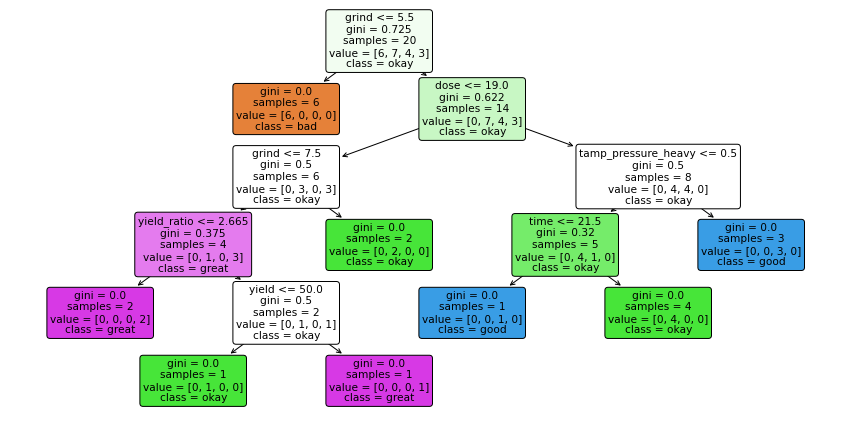

In [35]:
dtc = DecisionTreeClassifier(random_state=0)
dtc = dtc.fit(x_train, y_train)
plt.figure(figsize=(15, 7.5))
#plot_tree(dtc, filled=True, rounded=True, feature_names=x_encoded.columns, class_names=y['rating'].unique())
plot_tree(dtc, filled=True, rounded=True, feature_names=x_encoded.columns, class_names=y['rating'].unique())

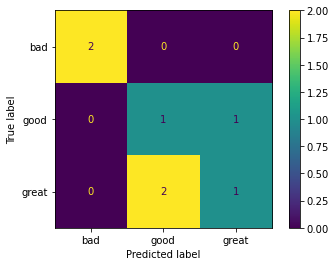

In [30]:
plot_confusion_matrix(dtc, x_test, y_test)